In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import date2num

In [4]:
dir_name1 = "/kuacc/users/merdogan18/hpc_run/tdd-plms/data_statistics/Processed-MC4/summary_mc4_total_stats_formatted15.json"
dir_name2 = "/kuacc/users/merdogan18/hpc_run/tdd-plms/data_statistics/Processed-Oscar/summary_oscar_data_formatted15.json"
dir_name3 = "/kuacc/users/merdogan18/hpc_run/tdd-plms/data_statistics/Processed-SketchEngine/summary_sketchengine_stats_formatted22.json"
dir_name4 = "/kuacc/users/merdogan18/hpc_run/tdd-plms/data_statistics/Processed-Kitap/summary_Engindenkitap_stats15.json"

lines1 = ""
for line in open(dir_name1, 'r', encoding='utf-8'):
    lines1 += line.strip()
    
lines2 = ""
for line in open(dir_name2, 'r', encoding='utf-8'):
    lines2 += line.strip()
    
lines3 = ""
for line in open(dir_name3, 'r', encoding='utf-8'):
    lines3 += line.strip()
    
lines4 = ""
for line in open(dir_name4, 'r', encoding='utf-8'):
    lines4 += line.strip()
    
d1 = json.loads(lines1)
d2 = json.loads(lines2)
d3 = json.loads(lines3)
d4 = json.loads(lines4)

keys = [i for i in d1["all"].keys()]

params1 = [d1["all"][i] for i in keys]
params2 = [d2["all"][i] for i in keys]
params3 = [d3["all"][i] for i in keys]
params4 = [d4["all"][i] for i in keys]
params = [params1, params2, params3, params4]
params = np.asarray(params)

In [5]:
sums = {}
for i in range(len(params[0])):
    sums[keys[i]] = list(params[:,i])
plotdata = pd.DataFrame(sums,index=['MC-4','Oscar','Sketch_Engine','Gözde_Hoca_kitap']).T

In [6]:
mc4_size = 33.11+33.16+33.11+33.13+33.14+33.10+33.11+33.11
sketch_size = 28.26
oscar_size = 55.17
mc4_size + sketch_size + oscar_size

348.4

In [7]:
plotdata.loc['new size(GB)'] = [mc4_size, oscar_size, sketch_size, 'NaN']
pd.options.display.float_format = '{:,.4e}'.format
plotdata

,MC-4,Oscar,Sketch_Engine,Gözde_Hoca_kitap
size(GB),3.3796e+02,6.0728e+01,3.4061e+01,3.7052e-01
total_samples,8.7595e+07,1.0826e+07,1.1871e+07,7.6900e+02
length_total,2.4437e+11,5.2315e+10,2.5614e+10,3.5739e+08
nltk_word_total,3.8379e+10,8.1163e+09,3.9801e+09,6.0247e+07
nltk_sentence_total,1.7445e+09,3.5122e+08,2.1848e+08,4.5823e+06
punctutation_total,7.7167e+09,1.3666e+09,6.1365e+08,1.3468e+07
ascii_letters_total,1.7769e+11,3.8591e+10,1.9052e+10,2.5658e+08
ascii_lowercase_total,1.6413e+11,3.5865e+10,1.8365e+10,2.4783e+08
ascii_uppercase_total,1.3562e+10,2.7259e+09,6.8678e+08,8.7590e+06
digits_total,6.0414e+09,9.6965e+08,1.9467e+08,1.2696e+06


parameter no:  0


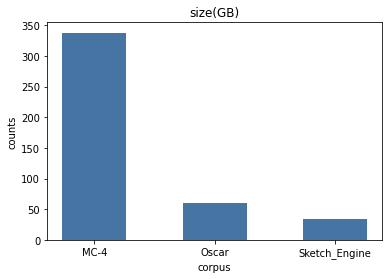

parameter no:  1


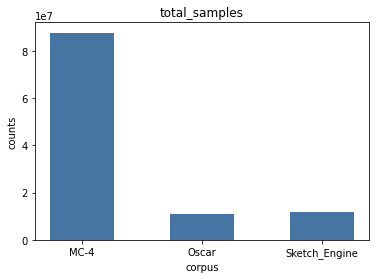

parameter no:  2


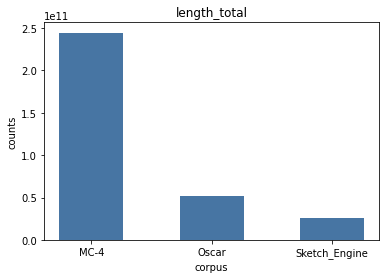

parameter no:  3


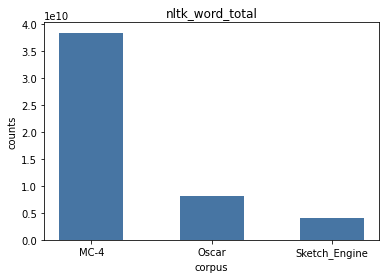

parameter no:  4


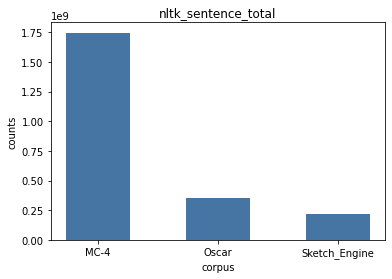

parameter no:  5


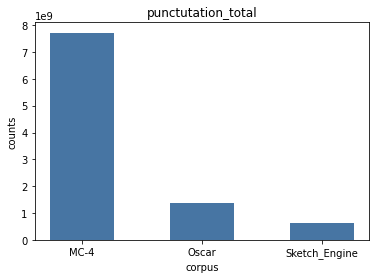

parameter no:  6


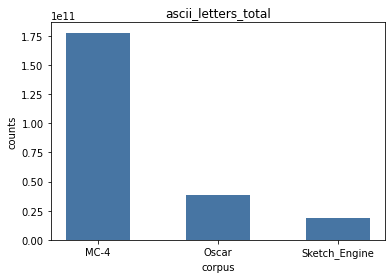

parameter no:  7


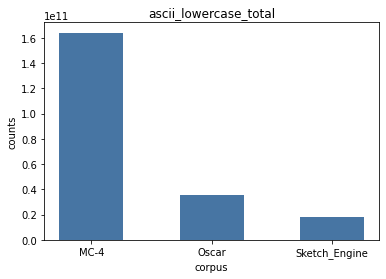

parameter no:  8


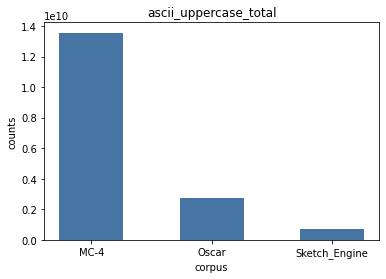

parameter no:  9


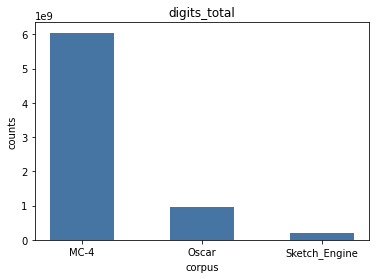

parameter no:  10


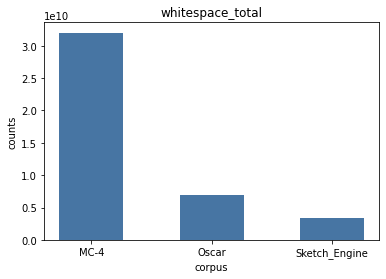

parameter no:  11


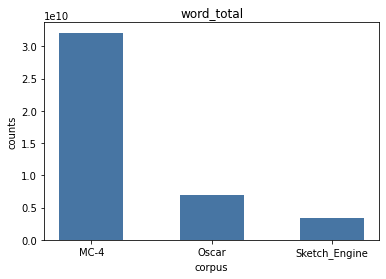

parameter no:  12


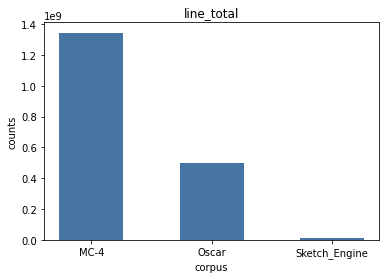

parameter no:  13


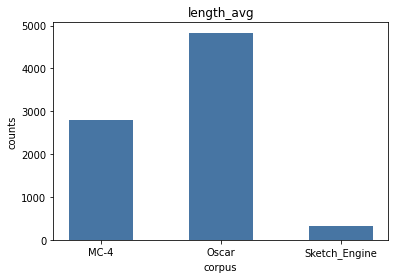

parameter no:  14


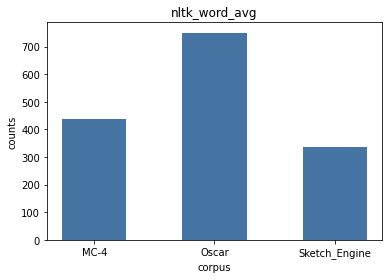

parameter no:  15


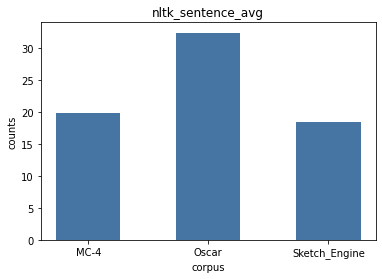

parameter no:  16


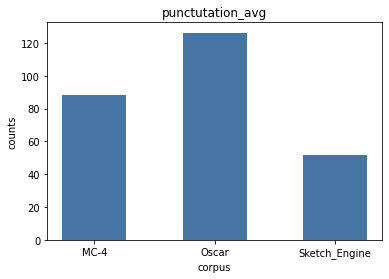

parameter no:  17


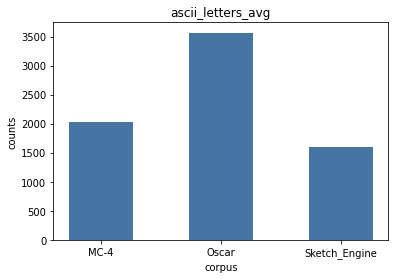

parameter no:  18


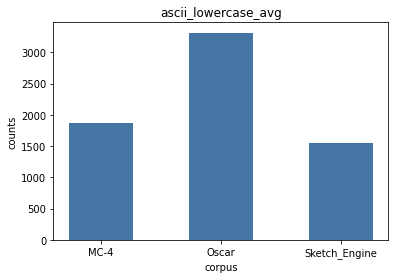

parameter no:  19


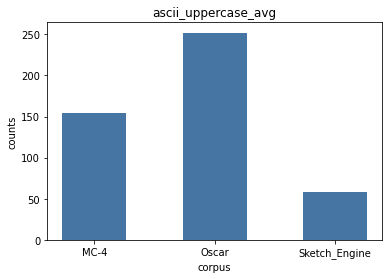

parameter no:  20


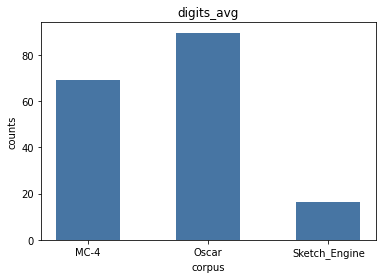

parameter no:  21


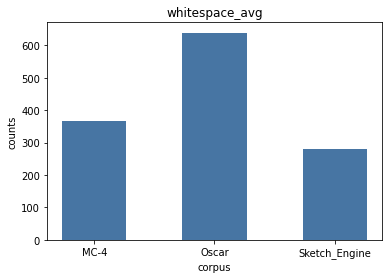

parameter no:  22


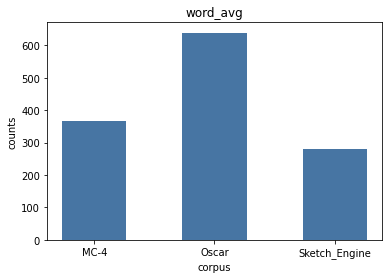

parameter no:  23


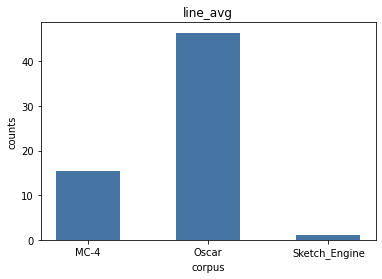

parameter no:  24


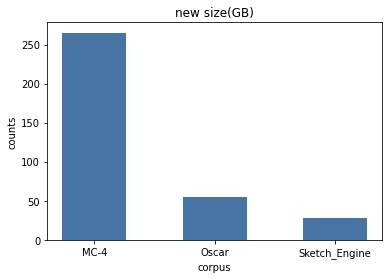

In [8]:
bars = ('MC-4','Oscar','Sketch_Engine')
x_pos = np.arange(len(bars))*1.5

for i,key in enumerate(list(plotdata.T)):
    print("parameter no: ",i)
    vals = np.asarray(plotdata[i:i+1])[0]
    plt.bar(x_pos, vals[0:3], color=(0.2, 0.4, 0.6, 0.9))
    plt.xticks(x_pos, bars)
    plt.title(key)
    plt.xlabel("corpus")
    plt.ylabel("counts")
    plt.show()